=== Dataset Overview ===
Total games simulated: 1,600
Unique strategy pairs: 16

First 5 rows:
  Player1_Strategy Player2_Strategy  Player1_Score  Player2_Score   Winner  \
0           Random           Random             17             31  Player2   
1           Random           Random             20             28  Player2   
2           Random           Random             31             17  Player1   
3           Random           Random             18             30  Player2   
4           Random           Random             26             22  Player1   

   Moves  Time_Seconds  
0     32         0.001  
1     53         0.001  
2     45         0.001  
3     48         0.001  
4     33         0.001  

=== Basic Statistics ===
Average scores:
       Player1_Score  Player2_Score
count     1600.00000     1600.00000
mean        26.95125       21.04875
std          8.82355        8.82355
min          4.00000        4.00000
25%         21.00000       15.00000
50%         26.00000       2

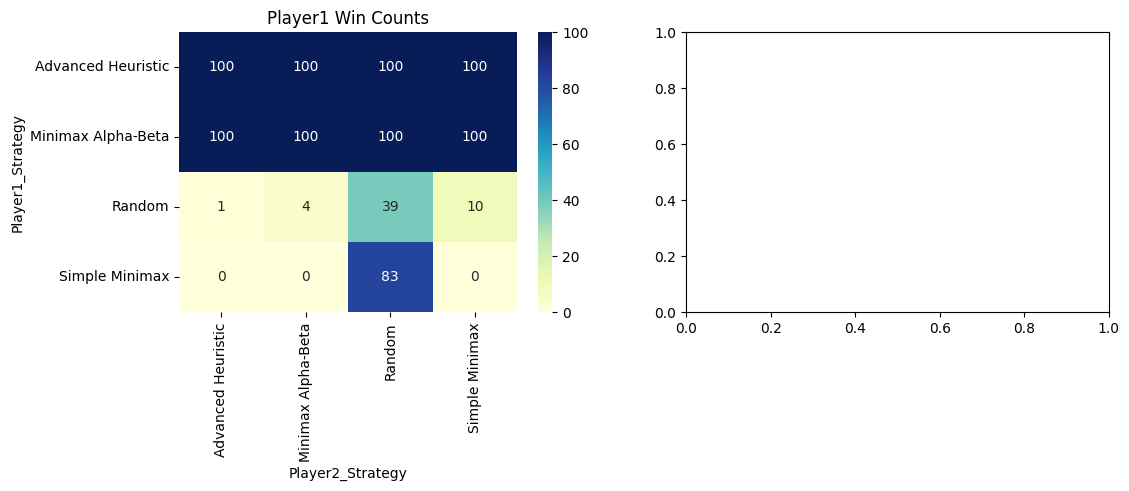

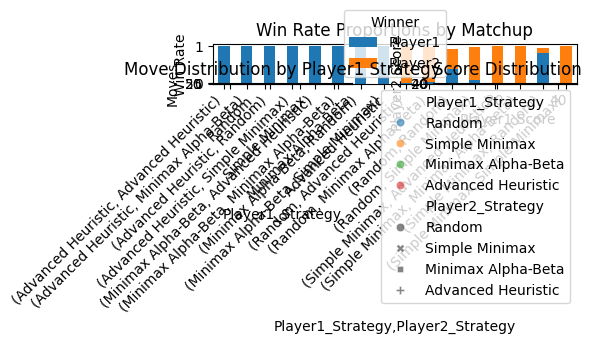


=== Advanced Metrics ===

Matchup Statistics:
                                       Avg_Score_Diff  Moves  Time_Seconds  \
Player1_Strategy   Player2_Strategy                                          
Advanced Heuristic Advanced Heuristic            4.00   42.0       3.98422   
                   Minimax Alpha-Beta            4.00   41.0       3.09336   
                   Random                       12.10   32.5       2.58110   
                   Simple Minimax               38.00   30.0       3.55326   
Minimax Alpha-Beta Advanced Heuristic           34.00   23.0       0.76556   
                   Minimax Alpha-Beta            6.00   35.0       0.38323   
                   Random                       19.30   30.0       0.19912   
                   Simple Minimax               28.00   28.0       0.51586   
Random             Advanced Heuristic          -12.74   35.0       2.06700   
                   Minimax Alpha-Beta          -13.74   33.0       0.18493   
                 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_results(csv_path):
    # Load the data
    df = pd.read_csv(csv_path)
    
    # Basic info
    print("=== Dataset Overview ===")
    print(f"Total games simulated: {len(df):,}")
    print(f"Unique strategy pairs: {df[['Player1_Strategy', 'Player2_Strategy']].drop_duplicates().shape[0]}")
    print("\nFirst 5 rows:")
    print(df.head())
    
    # Basic statistics
    print("\n=== Basic Statistics ===")
    print("Average scores:")
    print(df[['Player1_Score', 'Player2_Score']].describe())
    
    print("\nGame duration stats:")
    print(df[['Moves', 'Time_Seconds']].describe())
    
    # Win rate analysis
    print("\n=== Win Rate Analysis ===")
    
    # Overall win rates
    overall_win_rates = df['Winner'].value_counts(normalize=True)
    print(f"\nOverall Win Rates:\n{overall_win_rates}")
    
    # Win rates by strategy pair
    strategy_win_rates = df.groupby(['Player1_Strategy', 'Player2_Strategy'])['Winner'] \
                         .value_counts(normalize=True) \
                         .unstack() \
                         .fillna(0)
    
    print("\nWin Rates by Strategy Matchup:")
    print(strategy_win_rates)
    
    # Visualization
    plt.figure(figsize=(12, 8))
    
    # Heatmap of Player1 win rates
    print("\nGenerating visualizations...")
    heatmap_data = df[df['Winner'] == 'Player1'].groupby(
        ['Player1_Strategy', 'Player2_Strategy']
    ).size().unstack().fillna(0)
    
    plt.subplot(2, 2, 1)
    sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='YlGnBu')
    plt.title('Player1 Win Counts')
    
    # Win rate comparison
    plt.subplot(2, 2, 2)
    strategy_win_rates[['Player1', 'Player2']].plot(kind='bar', stacked=True)
    plt.title('Win Rate Proportions by Matchup')
    plt.ylabel('Win Rate')
    plt.xticks(rotation=45, ha='right')
    
    # Move distribution
    plt.subplot(2, 2, 3)
    sns.boxplot(x='Player1_Strategy', y='Moves', data=df)
    plt.title('Move Distribution by Player1 Strategy')
    plt.xticks(rotation=45)
    
    # Score comparison
    plt.subplot(2, 2, 4)
    sns.scatterplot(x='Player1_Score', y='Player2_Score', 
                    hue='Player1_Strategy', style='Player2_Strategy',
                    data=df, alpha=0.6)
    plt.title('Score Distribution')
    plt.xlabel('Player1 Score')
    plt.ylabel('Player2 Score')
    
    plt.tight_layout()
    plt.savefig('mancala_analysis.png')
    plt.show()
    
    # Advanced metrics
    print("\n=== Advanced Metrics ===")
    df['Score_Difference'] = df['Player1_Score'] - df['Player2_Score']
    
    matchup_stats = df.groupby(['Player1_Strategy', 'Player2_Strategy']).agg({
        'Score_Difference': 'mean',
        'Moves': 'median',
        'Time_Seconds': 'mean',
        'Winner': lambda x: (x == 'Player1').mean()
    }).rename(columns={
        'Score_Difference': 'Avg_Score_Diff',
        'Winner': 'Player1_Win_Rate'
    })
    
    print("\nMatchup Statistics:")
    print(matchup_stats)

if __name__ == "__main__":
    csv_file = "mancala_simulation_results.csv"
    analyze_results(csv_file)